# Let's play with a fasta file of your interest

### You can download file from NCBI [https://www.ncbi.nlm.nih.gov/nuccore/]

### Here the example is genome sequence of Corona virus Corona_MT020881_1.fasta
#### Technically user can take any fasta file

Enter your fasta file:Corona_MT020881_1.fasta
You are parsing the fasta file of MT020881.1
Here is a brief description about this file 
MT020881.1 Wuhan seafood market pneumonia virus isolate 2019-nCoV/USA-WA1-F6/2020, complete genome
The length of this sequence is 29882


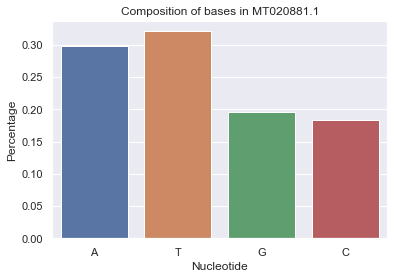

Also the %GC content of this sequence is 0.38


In [1]:
#https://nbviewer.jupyter.org/
fasta = input('Enter your fasta file:')   ## Please mention the path as well !

from Bio import SeqIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for Myfasta in SeqIO.parse(fasta, "fasta"):
    print('You are parsing the fasta file of ' + Myfasta.id)
    print("Here is a brief description about this file \n"+Myfasta.description)
    print('The length of this sequence is ' + str(len(Myfasta.seq)))
#Myseq = Myseq+str(Myfasta.seq)
#else:
#print ('Your file is corrupt')
#Corona_MT020881_1.fasta
base = ['A','T','G','C']
base_prop = []
for i in base:
    i = Myfasta.seq.count(i)
    base_prop.append(i/len(Myfasta.seq))
sns.set(style="darkgrid")
fig=sns.barplot(base[:],base_prop[:])
fig.set(xlabel='Nucleotide', ylabel='Percentage')
#plt.legend(labels="Composition of nucleotide")
plt.title("Composition of bases in "+Myfasta.id) 
plt.show(fig)
print ('Also the %GC content of this sequence is '+ str("%.2f" % (base_prop[2]+base_prop[3])))

## Lets explore a bit more...

*1. How the GC content varies per 1000 base of this genome?*

*2. Identify a substring and its location*

*3. Identify all posible occurences of a substring and its location in the sequence*


### How the GC content varies per 1000 base of this genome?

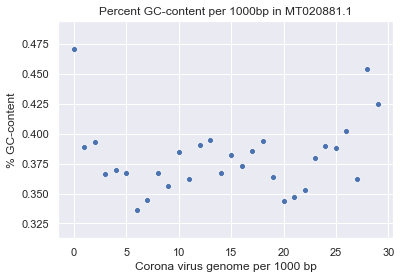

In [2]:
gc_1000=[]
for i in range(0,len(Myfasta.seq),1000):
    w = Myfasta.seq[i:i+1000]
#    c = (w.count('G') + w.count('C'))/len(w)
    gc_1000.append ((w.count('G') + w.count('C'))/len(w))
sns.set(style="darkgrid")
gc_1000bp=sns.scatterplot (range(0,len(gc_1000)), gc_1000,palette=None)
gc_1000bp.set(xlabel='Corona virus genome per 1000 bp', ylabel='% GC-content')
plt.title("Percent GC-content per 1000bp in "+Myfasta.id) 
plt.show(gc_1000bp)

### Identify a substring and its position

In [3]:
import re
y=str(Myfasta.seq)
m= re.search(r"ATG", y)
print('The 1st start codon is located at '+Myfasta.id+" genome's sequence pos "+ str(m.start())+"-"+str(m.end()))

The 1st start codon is located at MT020881.1 genome's sequence pos 106-109


### Identify any substring and its position simply by typing ATG or AT(A|T|G|C)...Regular expression

In [4]:
#import re
match= re.finditer(str(input('Where is sequence:')), y)
for i in match:
    print('pos '+str(i.start())+"-"+str(i.end()))

Where is sequence:GAATTCG
pos 1160-1167
pos 28550-28557


## Identify repeated substrings and its frequency
**NOTE: This code take some time and depends on the length of fasta sequence. a string 's' is taken as an example

In [5]:
s = "ATGCATGCACACATGATACAGATAGACACATCATACACATACATACATCATCATCATCATCAT"
d={}
#Identify repeating sequence of length>=3 and frequency >=10
for repseqlen in range(3,int(len(s)/2)):
    for i in range(0,len(s)-repseqlen):
        repseq = s[i:i+repseqlen]
        freq = s.count(repseq)
        if freq >= 10 and repseq not in d:
             d[repseq] = freq
d

{'CAT': 12}